In [77]:
#CDSの3mer,6merに関して出現頻度を比較

In [78]:
# SeqIO.parse(...)として呼び出せるように書いてください
"Bio(Biopython)からSeqIOモジュールをインポート" 
from Bio import SeqIO
# pd.DataFrame(...)が呼び出せるように書いてください
"pandasをpdと言う名前でインポート" 
import pandas as pd
# plt.figure()を実行できるように書いてください
"matplotlibのpyplotモジュールをpltという名前でインポート"
import matplotlib.pyplot as plt

In [79]:
path_to_genbank_file = ("/Users/miyakesho/Google_Drive/master/Class/生物情報実験法/python/task1/GCF_000231385.2_ASM23138v3_genomic.gbff") # 自分のファイルに書き換えてください
records = SeqIO.index(path_to_genbank_file, 'gb')

In [80]:
codon_to_Amino={
'TTT':'Phe',  'TTC':'Phe',  'TTA':'Leu',  'TTG':'Leu',  
'TCT':'Ser',  'TCC':'Ser',  'TCA':'Ser',  'TCG':'Ser',  
'TAT':'Tyr',  'TAC':'Tyr',  'TAA':'stop',  'TAG':'stop',  
'TGT':'Cys',  'TGC':'Cys',  'TGA':'stop',  'TGG':'Trp',  
'CTT':'Leu',  'CTC':'Leu',  'CTA':'Leu',  'CTG':'Leu',  
'CCT':'Pro',  'CCC':'Pro',  'CCA':'Pro',  'CCG':'Pro',  
'CAT':'His',  'CAC':'His',  'CAA':'Gln',  'CAG':'Gln',  
'CGT':'Arg',  'CGC':'Arg',  'CGA':'Arg',  'CGG':'Arg',  
'ATT':'Ile',  'ATC':'Ile',  'ATA':'Ile',  'ATG':'Met',  
'ACT':'Thr',  'ACC':'Thr',  'ACA':'Thr',  'ACG':'Thr',  
'AAT':'Asn',  'AAC':'Asn',  'AAA':'Lys',  'AAG':'Lys',  
'AGT':'Ser',  'AGC':'Ser',  'AGA':'Arg',  'AGG':'Arg',  
'GTT':'Val',  'GTC':'Val',  'GTA':'Val',  'GTG':'Val',  
'GCT':'Ala',  'GCC':'Ala',  'GCA':'Ala',  'GCG':'Ala',  
'GAT':'Asp',  'GAC':'Asp',  'GAA':'Glu',  'GAG':'Glu',  
'GGT':'Gly',  'GGC':'Gly',  'GGA':'Gly',  'GGG':'Gly'}

In [81]:
def dictionary_make(length):
    dictionary={}
    DNA=["A","T","G","C"]
    kmer=["A","T","G","C"]
    while (len(kmer[0])<length):
        new_kmer=[]
        for seq in kmer:
            for base in DNA:
                new_kmer.append(seq+base)
        kmer=new_kmer
    for sequence in kmer: 
        dictionary[sequence]=0
    return dictionary

In [82]:
def get_seq():
    path_to_genbank_file = ("GCF_000231385.2_ASM23138v3_genomic.gbff") 
    records = SeqIO.index(path_to_genbank_file, 'gb')
    record = records[list(records.keys())[0]]
    bacteria_sequence=record.seq
    
    return bacteria_sequence

In [83]:
def kmer_count(kmer_dict,length,DNA):
    for i in range(0,len(DNA),length):
        seq=DNA[i:i+length]
        try:
            kmer_dict[seq]+=1
        except KeyError:
                continue
    return kmer_dict

In [84]:
def convert(sequence):
    
    i=len(sequence)-1
    convert_seq=""
    while(i>=0):
        letter=sequence[i]
        if(letter=="A"):
            convert_seq+="T"
        elif(letter=="T"):
            convert_seq+="A"
        elif(letter=="G"):
            convert_seq+="C"
        elif(letter=="C"):
            convert_seq+="G"
        else:
            print("ERROR")
        i-=1
    
   
    return convert_seq

In [85]:
def make_codon_dictionary(length):
    alllength=0
    genome_sequence=get_seq()
    CDS_dictionary=dictionary_make(length)
    start_codon=["ATG","GTG","ATA","TTG"]
    
    for record_id, record in records.items():
        for feature in record.features:
            if feature.type=="CDS":
                CDS_sequence=genome_sequence[feature.location.start:feature.location.end]
                if(feature.location.strand==-1):
                    CDS_sequence=convert(CDS_sequence)
                start=CDS_sequence[0:3]
                if start in start_codon:
                    CDS_dictionary=kmer_count(CDS_dictionary,length,CDS_sequence)
                    alllength+=len(CDS_sequence)
    print(alllength)
    return CDS_dictionary
    

In [87]:
#3merの場合
length=3
codon_dictionary=make_codon_dictionary(length)

sorted_codon_dictionary= sorted(codon_dictionary.items(), key=lambda x:x[1])

4014605


In [106]:
codon_df=[]
for i,j in sorted_codon_dictionary:
    codon_df.append([i,j,codon_to_Amino[i]])
codon_df=pd.DataFrame(codon_df,columns=["codon","Count","Amino"])
codon_df

,codon,Count,Amino
0,TGA,998,stop
1,TAG,1198,stop
2,TAA,2446,stop
3,TGC,5688,Cys
4,CAC,6708,His
5,TCG,6994,Ser
6,AGG,7949,Arg
7,CGG,8322,Arg
8,CGC,8635,Arg
9,TGT,8974,Cys


In [189]:
all_amino=[]
for i in codon_df.Amino:
    if i not in all_amino:
        all_amino.append(i)
        
        
all_df_list=[]
use_codon=[]

while(len(use_codon)!=64):
    df_list=[]
    amino_list=[]
    for i in range(0,len(codon_df)):
        row=codon_df.iloc[i]
        amino=row.Amino
        codon=row.codon
        Count=row.Count
        
        if (amino not in amino_list and codon not in use_codon):
            amino_list.append(amino)
            use_codon.append(codon)
            df_list.append([amino,Count])
            
    for i in all_amino:
        if i not in amino_list:
            df_list.append([i,0])
        
    all_df_list.append(df_list)  

 

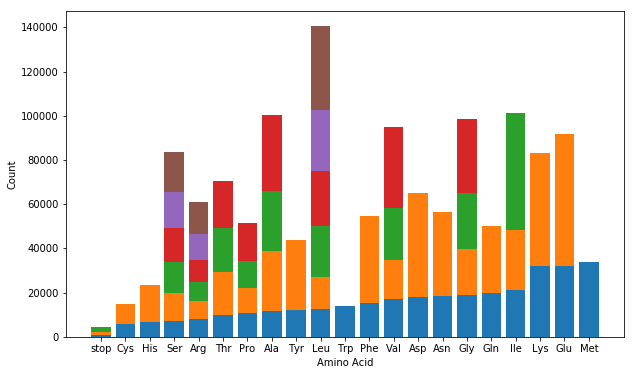

In [218]:
fig, ax = plt.subplots(figsize=(10, 6))


sum_list=all_df_list[0]
sum_pd=pd.DataFrame(sum_list,columns=["Amino","Count"])
#print(sum_pd)
for i in range(0,6):
    data=all_df_list[i]
    data=pd.DataFrame(data,columns=["Amino","Count"])
    new_data=[]
    for amino in all_amino:
        bool_list = data["Amino"] == amino
        amino_row=data[bool_list]
        amino_count=int(amino_row.Count)
        new_data.append([amino,amino_count])
    data=pd.DataFrame(new_data,columns=["Amino","Count"])
    data["Amino"] = pd.Categorical(data["Amino"],all_amino)
    
    if(i==0):
        ax.bar(data.Amino,data.Count)
    else:
        ax.bar(data.Amino,data.Count,bottom=sum_pd.Count)
        new_sum_list=[]
        for i in range(len(sum_pd)):
            row=sum_pd.iloc[i]
            Amino=row.Amino
            sum_count=row.Count
            bool_list = data["Amino"] == Amino
            amino_row=data[bool_list]
            amino_count=int(amino_row.Count)
            sum_count+=amino_count
            new_sum_list.append([Amino,sum_count])
        sum_list=new_sum_list
        sum_pd=pd.DataFrame(sum_list,columns=["Amino","Count"])
plt.xlabel('Amino Acid')
plt.ylabel('Count')
plt.savefig("codon_distribution.png",dpi=300)   
    



In [36]:
#6merの場合
length=6
six_mer_dictionary=make_codon_dictionary(length)
six_mer_dictionary

4014605


[('TAAAAT', 0),
 ('TAAATT', 0),
 ('TAAACG', 0),
 ('TAATAC', 0),
 ('TAATTA', 0),
 ('TAATTT', 0),
 ('TAATTC', 0),
 ('TAATGT', 0),
 ('TAATCG', 0),
 ('TAATCC', 0),
 ('TAAGAT', 0),
 ('TAAGAG', 0),
 ('TAAGTT', 0),
 ('TAAGTG', 0),
 ('TAAGGT', 0),
 ('TAAGCT', 0),
 ('TAAGCG', 0),
 ('TAAGCC', 0),
 ('TAACAT', 0),
 ('TAACTA', 0),
 ('TAACTG', 0),
 ('TAACTC', 0),
 ('TAACGT', 0),
 ('TAACGC', 0),
 ('TAACCA', 0),
 ('TAACCT', 0),
 ('TAGAAA', 0),
 ('TAGAAT', 0),
 ('TAGAAC', 0),
 ('TAGATG', 0),
 ('TAGAGT', 0),
 ('TAGAGC', 0),
 ('TAGACG', 0),
 ('TAGTAA', 0),
 ('TAGTTC', 0),
 ('TAGTGA', 0),
 ('TAGTGG', 0),
 ('TAGTGC', 0),
 ('TAGTCA', 0),
 ('TAGTCT', 0),
 ('TAGTCG', 0),
 ('TAGTCC', 0),
 ('TAGGAT', 0),
 ('TAGGAG', 0),
 ('TAGGTA', 0),
 ('TAGGTC', 0),
 ('TAGGGA', 0),
 ('TAGGGC', 0),
 ('TAGGCA', 0),
 ('TAGGCG', 0),
 ('TAGGCC', 0),
 ('TAGCAA', 0),
 ('TAGCTA', 0),
 ('TAGCGT', 0),
 ('TAGCGG', 0),
 ('TAGCGC', 0),
 ('TAGCCT', 0),
 ('TAGCCG', 0),
 ('TAGCCC', 0),
 ('TGAATC', 0),
 ('TGAACG', 0),
 ('TGAACC', 0),
 ('TGATA

In [40]:

six_mer_df=[]
for i,j in six_mer_dictionary.items():
    six_mer_df.append([i,j])
six_mer_df=pd.DataFrame(six_mer_df,columns=["kmer","count"])
six_mer_df

,kmer,count
0,AAAAAA,866
1,AAAAAT,695
2,AAAAAG,736
3,AAAAAC,481
4,AAAATA,518
5,AAAATT,856
6,AAAATG,618
7,AAAATC,593
8,AAAAGA,286
9,AAAAGT,312


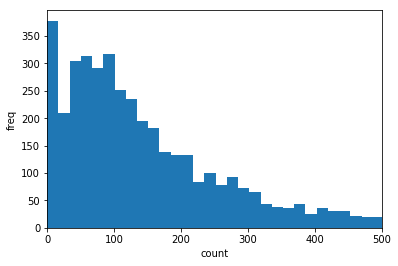

In [67]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(six_mer_df["count"], bins=100)
plt.xlim(0, 500)
ax.set_xlabel('count')
ax.set_ylabel('freq')
fig.show()
